**DATASET DATA PROCESSING**

The following jupyter notebook explores the [NSL-KDD dataset](https://www.unb.ca/cic/datasets/nsl.html) and then preprocessed the data to be used with Machine Learning algorithms in the classifiers.ipynb file. 

In [1]:
#IMPORT NECESSARY MODULES#
import matplotlib
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import sklearn

#MOUNT GOOGLE DRIVE#
from google.colab import drive
drive.mount('/content/drive/')

Mounted at /content/drive/


**IMPORTING THE DATASET**

The NSL-KDD dataset consists of a **train.txt** and a **test.txt** dataframes. In the following code, the respective datasets are imported into the notebook. Due to the datasets being in .txt format, via the Pandas module's .read_table() function the data is converted into a Dataframe format.

The intended column labels (column_labels) need to be applied to the dataframe in line with the respective data. 

In [ ]:
#DATA COLUMNS TAKEN FROM ORIGINAL DATAFRAME#
column_labels = ["duration","protocol_type","service","flag","src_bytes","dst_bytes","land","wrong_fragment","urgent","hot","num_failed_logins","logged_in","num_compromised","root_shell","su_attempted","num_root",
"num_file_creations","num_shells","num_access_files","num_outbound_cmds","is_host_login","is_guest_login","count","srv_count","serror_rate","srv_serror_rate","rerror_rate","srv_rerror_rate","same_srv_rate",
"diff_srv_rate","srv_diff_host_rate","dst_host_count","dst_host_srv_count","dst_host_same_srv_rate","dst_host_diff_srv_rate","dst_host_same_src_port_rate","dst_host_srv_diff_host_rate","dst_host_serror_rate",
"dst_host_srv_serror_rate","dst_host_rerror_rate","dst_host_srv_rerror_rate","attack", "last_flag"]

#CONVERT .TXT FORMAT FILE INTO A PANDAS DATAFRAME#
traindata = pd.read_table('/content/drive/My Drive/DISSERTATION/dataset/train.txt', names=column_labels, sep=',')
testdata = pd.read_table('/content/drive/My Drive/DISSERTATION/dataset/test.txt', names=column_labels, sep=',')

#REMOVE difficulty_level COLUMN AS IT SERVES NO USE#
traindata = traindata.iloc[:,:-1] 
testdata = testdata.iloc[:,:-1] 


In [ ]:
#DISPLAY THE DATAFRAME STRUCTURE#
display(traindata)

,duration,protocol_type,service,flag,src_bytes,dst_bytes,land,wrong_fragment,urgent,hot,...,dst_host_srv_count,dst_host_same_srv_rate,dst_host_diff_srv_rate,dst_host_same_src_port_rate,dst_host_srv_diff_host_rate,dst_host_serror_rate,dst_host_srv_serror_rate,dst_host_rerror_rate,dst_host_srv_rerror_rate,attack
0,0,tcp,ftp_data,SF,491,0,0,0,0,0,...,25,0.17,0.03,0.17,0.00,0.00,0.00,0.05,0.00,normal
1,0,udp,other,SF,146,0,0,0,0,0,...,1,0.00,0.60,0.88,0.00,0.00,0.00,0.00,0.00,normal
2,0,tcp,private,S0,0,0,0,0,0,0,...,26,0.10,0.05,0.00,0.00,1.00,1.00,0.00,0.00,neptune
3,0,tcp,http,SF,232,8153,0,0,0,0,...,255,1.00,0.00,0.03,0.04,0.03,0.01,0.00,0.01,normal
4,0,tcp,http,SF,199,420,0,0,0,0,...,255,1.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,normal
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
125968,0,tcp,private,S0,0,0,0,0,0,0,...,25,0.10,0.06,0.00,0.00,1.00,1.00,0.00,0.00,neptune
125969,8,udp,private,SF,105,145,0,0,0,0,...,244,0.96,0.01,0.01,0.00,0.00,0.00,0.00,0.00,normal
125970,0,tcp,smtp,SF,2231,384,0,0,0,0,...,30,0.12,0.06,0.00,0.00,0.72,0.00,0.01,0.00,normal
125971,0,tcp,klogin,S0,0,0,0,0,0,0,...,8,0.03,0.05,0.00,0.00,1.00,1.00,0.00,0.00,neptune


========================================================================================================




========================================================================================================


**DATASET EVALUATION**

The following parts of the dataset are evaluated (in both the training and test datasets):


*   Service Types 
*   Protocol Types
*   Attack Types
*   Normal Vs Abnormal Traffic Samples
*   Data Values Analysis

Analysing the dataset is important as this it gives us useful insights as to be able to choose the correct machine learning algorithms which would work effectively with our dataset. 




**SERVICE TYPES**

The service type determines the service which facilitated the network operation of the data packets in the dataset. 

This is important to get context of as different service types affect network data packet transfer differently. Thus in the context of our project we need to determine how the same attack may potentially have different network behaviour under a different service type.


**TRAINING DATA**

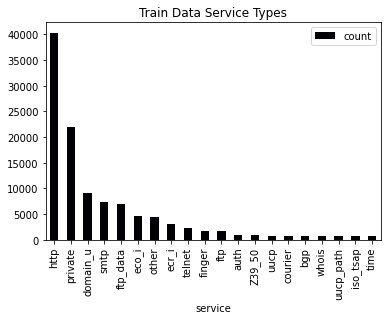

In [ ]:
#SELECTS THE 'service' COLUMN AND COUNTS THE NUMBER OF EACH INSTANCE#
services_freq = traindata.groupby('service').count()
services_freq = services_freq.iloc[:, 0:1]
services_freq = services_freq.rename(columns={'duration': 'count'})

#SORT VALUES IN A DESCENDING ORDER#
services_freq = services_freq.sort_values(by=['count'], ascending=False)

#PLOT ONLY THE TOP 20 MOST FREQUENT SERVICE TYPES#
ser_plot = services_freq.iloc[0:20, :]
ser_plot.plot.bar(colormap='magma', y='count', title='Train Data Service Types')

**TEST DATA**

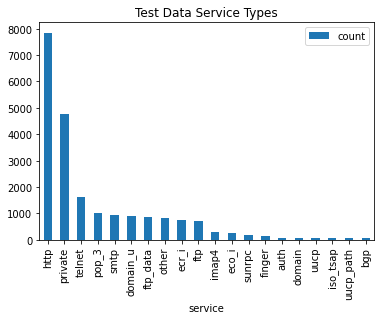

In [ ]:
#SELECTS THE 'service' COLUMN AND COUNTS THE NUMBER OF EACH INSTANCE#
services_freq = testdata.groupby('service').count()
services_freq = services_freq.iloc[:, 0:1]
services_freq = services_freq.rename(columns={'duration': 'count'})

#SORT VALUES IN A DESCENDING ORDER#
services_freq = services_freq.sort_values(by=['count'], ascending=False)

#PLOT ONLY THE TOP 20 MOST FREQUENT SERVICE TYPES#
ser_plot = services_freq.iloc[0:20, :]
ser_plot.plot.bar(y='count', title='Test Data Service Types')

**PROTOCOL TYPES**

In the NSL-KDD dataset, there are 3 Protocol Types Represented:


*   TCP (Transmission Control Protocol)
*   UDP (User Datagram Protocol)
*   ICMP (Internet Control Message Protocol)

This is an important factor to take into account as each of the Protocol Types work under a different set of rules in which they transmit data. As a result, their varying rules can have an affect on how an attack type is presented within the context of the Protocol Type.





**TRAIN DATA**

array([<matplotlib.axes._subplots.AxesSubplot object at 0x7f613e2c3590>],
      dtype=object)

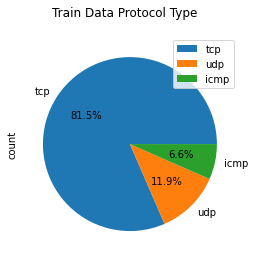

In [ ]:
#SELECTS THE 'protocol' COLUMN AND COUNTS THE NUMBER OF EACH INSTANCE#
protocol_freq = traindata.groupby('protocol_type').count()
protocol_freq = protocol_freq.iloc[:, 0:1]
protocol_freq = protocol_freq.rename(columns={'duration': 'count'})

#SORT VALUES IN A DESCENDING ORDER#
protocol_freq = protocol_freq.sort_values(by=['count'], ascending=False)

#PLOT PIE CHART SHOWING PERCENTAGES OF PROTOCOL TYPES IN DATASET#
protocol_freq.plot.pie(subplots=True, title='Train Data Protocol Type', autopct='%1.1f%%')

**TEST DATA**

array([<matplotlib.axes._subplots.AxesSubplot object at 0x7f613f4a1110>],
      dtype=object)

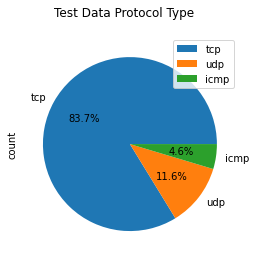

In [ ]:
#SELECTS THE 'protocol' COLUMN AND COUNTS THE NUMBER OF EACH INSTANCE#
protocol_freq = testdata.groupby('protocol_type').count()
protocol_freq = protocol_freq.iloc[:, 0:1]
protocol_freq = protocol_freq.rename(columns={'duration': 'count'})

#SORT VALUES IN A DESCENDING ORDER#
protocol_freq = protocol_freq.sort_values(by=['count'], ascending=False)

#PLOT PIE CHART SHOWING PERCENTAGES OF PROTOCOL TYPES IN DATASET#
protocol_freq.plot.pie(subplots=True, title='Test Data Protocol Type', autopct='%1.1f%%')

**ATTACK TYPES**

The attack types in the dataset represent the following categories of attacks:
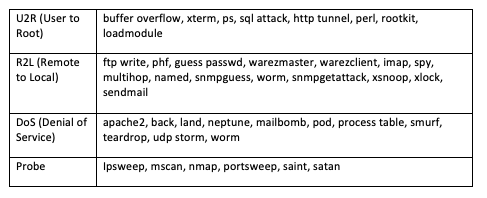

The representation of the attack types is important and has to be true to its rarity in a real scenario. For example, if a commonly occuring attack is under represented in this dataset, this could result in a low detection rate for that attack type from the classifiers.

On the other hand, an over representation of a rarely occuring attack could create a lower precision rate within all the other forms of attacks. It would also increase the False Positive rate for that specific over represented attack.

Therefore, the proportions of the attack types have to be as truly-represented (with context to real life scenarions) as possible. 

**TRAIN DATA**

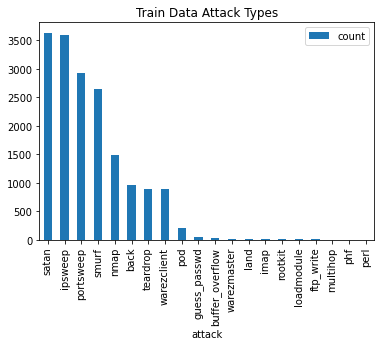

In [ ]:
attack_freq = traindata.groupby('attack').count()
attack_freq = attack_freq.iloc[:, 0:1]
attack_freq = attack_freq.rename(columns={'duration': 'count'})
attack_freq = attack_freq.drop(labels=['normal','neptune'])
attack_freq = attack_freq.sort_values(by=['count'], ascending=False)
att_plot = attack_freq.iloc[0:20, :]
att_plot.plot.bar(title='Train Data Attack Types')

**TEST DATA**

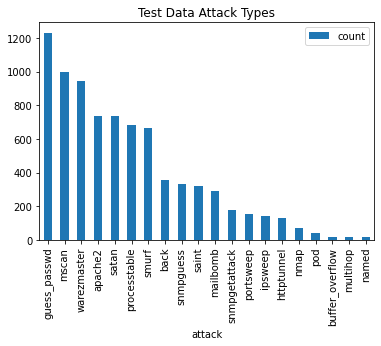

In [ ]:
attack_freq = testdata.groupby('attack').count()
attack_freq = attack_freq.iloc[:, 0:1]
attack_freq = attack_freq.rename(columns={'duration': 'count'})
attack_freq = attack_freq.drop(labels=['normal','neptune'])
attack_freq = attack_freq.sort_values(by=['count'], ascending=False)
att_plot = attack_freq.iloc[0:20, :]
att_plot.plot.bar(title='Test Data Attack Types')

**NORMAL VS ABNORMAL SCENARIOS**

This is the most important aspect of the dataset. This is as it determines the labels which are fed into the classifiers to both train and then analyse classifier performance on the test dataset. 

As a result, the split between normal and abnormal network instances should be rather evenly split. 


**TRAIN DATASET**

TRAINING DATASET ATTACK SCENARIOS
Abnormal Scenarios: 58630
Normal Scenarios: 67343



Text(0.5, 1.0, 'Train Dataset Attack Instances')

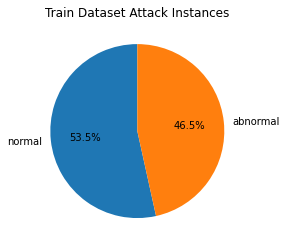

In [ ]:
#CONVERTS 'attack' COLUMN VALUES INTO A LIST#
column = list(traindata['attack'])

#VARIABLES COUNT NUMBER OF NORMAL AND ABNORMAL SCENARIOS#
train_normal_scenario = 0
train_abnormal_scenario = 0

#ITERATES THROUGH THE COLUMN LIST VALUES TO SEE WHETHER COLUMN LABEL IS 'normal' or 'abnormal'#
for i in column:
  if i == 'normal':
    train_normal_scenario = train_normal_scenario + 1
  else:
    train_abnormal_scenario = train_abnormal_scenario + 1

#PRINT NUMBER OF ABNORMAL AND NORMAL INSTANCES IN THE DATASET#
print('TRAINING DATASET ATTACK SCENARIOS')
print('==================================')
print('Abnormal Scenarios: ' + str(train_abnormal_scenario))
print('Normal Scenarios: ' + str(train_normal_scenario) + "\n")

#PRODUCE PIE CHART TO DEMONSTRATE PERCENTAGE OF NORMAL AND ABNORMAL INSTANCES#
arr = np.array([train_normal_scenario, train_abnormal_scenario])
lbl = ['normal', 'abnormal']
plt.pie(arr, labels = lbl, startangle = 90, autopct='%1.1f%%')
plt.title('Train Dataset Attack Instances')


**TEST DATASET**

TEST DATASET ATTACK SCENARIOS
Abnormal Scenarios: 12833
Normal Scenarios: 9711



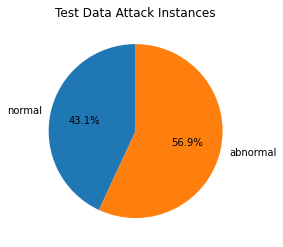

In [ ]:
#CONVERTS 'attack' COLUMN VALUES INTO A LIST#
column = list(testdata['attack'])

#VARIABLES COUNT NUMBER OF NORMAL AND ABNORMAL SCENARIOS#
test_normal_scenario = 0
test_abnormal_scenario = 0

#ITERATES THROUGH THE COLUMN LIST VALUES TO SEE WHETHER COLUMN LABEL IS 'normal' or 'abnormal'#
for i in column:
  if i == 'normal':
    test_normal_scenario = test_normal_scenario + 1
  else:
    test_abnormal_scenario = test_abnormal_scenario + 1

#PRINT NUMBER OF ABNORMAL AND NORMAL INSTANCES IN THE DATASET#
print('TEST DATASET ATTACK SCENARIOS')
print('==================================')
print('Abnormal Scenarios: ' + str(test_abnormal_scenario))
print('Normal Scenarios: ' + str(test_normal_scenario) + "\n")

#PRODUCE PIE CHART TO DEMONSTRATE PERCENTAGE OF NORMAL AND ABNORMAL INSTANCES#
arr = np.array([test_normal_scenario, test_abnormal_scenario])
lbl = ['normal', 'abnormal']
plt.pie(arr, labels = lbl, startangle = 90, autopct='%1.1f%%')
plt.title('Test Data Attack Instances')
plt.show()

**DATA ANALYSIS**

The describe() function helps to analyse key variables such as mean, standard deviation, minimum and maximum values among many others. 

These are essential as they can show us values to further help analyse the dataset. In addition, they can help show how standardisation/normalisation affects the dataset figures. For example, a MinMaxScaler can decrease the standard deviation of the dataset substatially. 

In [ ]:
#describe() FUNCTION SHOWS ANALYSIS OF THE INDIVIDUAL VALUES WITHIN THE DATASET#
traindata_analyse = traindata.describe()
display(traindata_analyse)

,duration,src_bytes,dst_bytes,land,wrong_fragment,urgent,hot,num_failed_logins,logged_in,num_compromised,...,dst_host_count,dst_host_srv_count,dst_host_same_srv_rate,dst_host_diff_srv_rate,dst_host_same_src_port_rate,dst_host_srv_diff_host_rate,dst_host_serror_rate,dst_host_srv_serror_rate,dst_host_rerror_rate,dst_host_srv_rerror_rate
count,125973.00000,1.259730e+05,1.259730e+05,125973.000000,125973.000000,125973.000000,125973.000000,125973.000000,125973.000000,125973.000000,...,125973.000000,125973.000000,125973.000000,125973.000000,125973.000000,125973.000000,125973.000000,125973.000000,125973.000000,125973.000000
mean,287.14465,4.556674e+04,1.977911e+04,0.000198,0.022687,0.000111,0.204409,0.001222,0.395736,0.279250,...,182.148945,115.653005,0.521242,0.082951,0.148379,0.032542,0.284452,0.278485,0.118832,0.120240
std,2604.51531,5.870331e+06,4.021269e+06,0.014086,0.253530,0.014366,2.149968,0.045239,0.489010,23.942042,...,99.206213,110.702741,0.448949,0.188922,0.308997,0.112564,0.444784,0.445669,0.306557,0.319459
min,0.00000,0.000000e+00,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.00000,0.000000e+00,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,82.000000,10.000000,0.050000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,0.00000,4.400000e+01,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,255.000000,63.000000,0.510000,0.020000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,0.00000,2.760000e+02,5.160000e+02,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,...,255.000000,255.000000,1.000000,0.070000,0.060000,0.020000,1.000000,1.000000,0.000000,0.000000
max,42908.00000,1.379964e+09,1.309937e+09,1.000000,3.000000,3.000000,77.000000,5.000000,1.000000,7479.000000,...,255.000000,255.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


Total value of all standard deviation figures is printed below to show how it is affected after normalisation.

In [ ]:
#FIND THE MEAN OF ALL STANDARD DEVIATION FIGURES TO SHOW HOW IT IS AFFECTED#
std_val = traindata.std().mean()
print(std_val)

260385.7628896119


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  


========================================================================================================

========================================================================================================

**DATA NORMALISATION**

Normalising/Standardising data is very important as to get the most out of machine learning algorithms. This is especially essential as a lot of the different columns in the dataset have different ranges of values. 

A lack of normalisation would cause severe performance problems and training efficency of the classifiers. 

To normalise my numerical data I had two options from the sklearn library:



*   MinMaxScaler: transforms the data and scales the value features between a set range (feature_range=(x,y)).
*   StandardScaler: transform data to maintain a standard deviation of 1 and a mean of 0 throughout the entire dataset structure. 



In [ ]:
#IMPORT NECESSARY PREPROCESSING PACKAGES#
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import OneHotEncoder
from sklearn import preprocessing
enc = LabelEncoder()
num_sc = StandardScaler()
#sc = MinMaxScaler()#feature_range=(0,2)#

#TRAIN AND TEST DATA CONCATENATED TOGETHER#
train_data_norm = pd.concat([traindata,testdata],axis=0, ignore_index=True)

#STANDARDISE NUMERICAL DATA#
numberdata = train_data_norm.select_dtypes(include='number')#.columns#
numberdata_columns = train_data_norm.select_dtypes(include='number').columns
num_sc.fit(numberdata)
numberdata_scaled = num_sc.transform(numberdata)
numprocessed_data = pd.DataFrame(numberdata_scaled, columns=numberdata_columns)

#NORMALISE CATEGORICAL DATA USING ONE HOT ENCODING#
catdata = train_data_norm.select_dtypes(include='object')
attack_label = catdata[['attack']].copy()
catdata = catdata.iloc[:, :-1]
catdata = pd.get_dummies(catdata)

#CONCATENATE NUMERIC AND CATEGORICAL DATA TOGETHER#
frames = [catdata, numprocessed_data, attack_label]
data_normalised = pd.concat(frames,axis=1,join='inner')

#SPLIT UP THE TRAIN AND TEST DATASET AGAIN#
traindata_normalised = data_normalised.iloc[:125973]
testdata_normalised = data_normalised.iloc[125973:]

#PRINT NORMALISED TRAIN DATASET#
print('TRAINING DATA NORMALISED')
print('========================')
display(traindata_normalised)

#PRINT NORMALISED TEST DATASET#
print('TEST DATA NORMALISED')
print('========================')
display(testdata_normalised)

TRAINING DATA NORMALISED


,protocol_type_icmp,protocol_type_tcp,protocol_type_udp,service_IRC,service_X11,service_Z39_50,service_aol,service_auth,service_bgp,service_courier,...,dst_host_srv_count,dst_host_same_srv_rate,dst_host_diff_srv_rate,dst_host_same_src_port_rate,dst_host_srv_diff_host_rate,dst_host_serror_rate,dst_host_srv_serror_rate,dst_host_rerror_rate,dst_host_srv_rerror_rate,attack
0,0,1,0,0,0,0,0,0,0,0,...,-0.849240,-0.813554,-0.278736,0.077981,-0.280650,-0.597720,-0.584813,-0.267151,-0.406815,normal
1,0,0,1,0,0,0,0,0,0,0,...,-1.065006,-1.192968,2.657874,2.378421,-0.280650,-0.597720,-0.584813,-0.422074,-0.406815,normal
2,0,1,0,0,0,0,0,0,0,0,...,-0.840250,-0.969783,-0.175697,-0.472829,-0.280650,1.736012,1.742295,-0.422074,-0.406815,neptune
3,0,1,0,0,0,0,0,0,0,0,...,1.218511,1.038878,-0.433294,-0.375627,0.086408,-0.527708,-0.561542,-0.422074,-0.376989,normal
4,0,1,0,0,0,0,0,0,0,0,...,1.218511,1.038878,-0.433294,-0.472829,-0.280650,-0.597720,-0.584813,-0.422074,-0.406815,normal
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
125968,0,1,0,0,0,0,0,0,0,0,...,-0.849240,-0.969783,-0.124178,-0.472829,-0.280650,1.736012,1.742295,-0.422074,-0.406815,neptune
125969,0,0,1,0,0,0,0,0,0,0,...,1.119618,0.949604,-0.381775,-0.440428,-0.280650,-0.597720,-0.584813,-0.422074,-0.406815,normal
125970,0,1,0,0,0,0,0,0,0,0,...,-0.804289,-0.925146,-0.124178,-0.472829,-0.280650,1.082567,-0.584813,-0.391090,-0.406815,normal
125971,0,1,0,0,0,0,0,0,0,0,...,-1.002074,-1.126012,-0.175697,-0.472829,-0.280650,1.736012,1.742295,-0.422074,-0.406815,neptune


TEST DATA NORMALISED


,protocol_type_icmp,protocol_type_tcp,protocol_type_udp,service_IRC,service_X11,service_Z39_50,service_aol,service_auth,service_bgp,service_courier,...,dst_host_srv_count,dst_host_same_srv_rate,dst_host_diff_srv_rate,dst_host_same_src_port_rate,dst_host_srv_diff_host_rate,dst_host_serror_rate,dst_host_srv_serror_rate,dst_host_rerror_rate,dst_host_srv_rerror_rate,attack
125973,0,1,0,0,0,0,0,0,0,0,...,-0.984094,-1.103694,-0.124178,-0.472829,-0.280650,-0.597720,-0.584813,2.676395,2.575756,neptune
125974,0,1,0,0,0,0,0,0,0,0,...,-1.065006,-1.192968,-0.124178,-0.472829,-0.280650,-0.597720,-0.584813,2.676395,2.575756,neptune
125975,0,1,0,0,0,0,0,0,0,0,...,-0.300837,0.168458,-0.227217,1.503606,-0.097121,-0.597720,-0.584813,-0.422074,-0.406815,normal
125976,1,0,0,0,0,0,0,0,0,0,...,-0.561553,1.038878,-0.433294,2.767228,2.288754,-0.597720,-0.584813,-0.422074,-0.406815,saint
125977,0,1,0,0,0,0,0,0,0,0,...,-0.300837,-0.501095,0.442537,-0.375627,-0.097121,-0.597720,-0.584813,2.149655,1.710811,mscan
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
148512,0,1,0,0,0,0,0,0,0,0,...,0.193625,0.413961,-0.124178,-0.440428,-0.188885,-0.574382,-0.584813,-0.422074,-0.406815,normal
148513,0,1,0,0,0,0,0,0,0,0,...,1.218511,1.038878,-0.433294,-0.440428,-0.188885,-0.574382,-0.584813,-0.422074,-0.406815,normal
148514,0,1,0,0,0,0,0,0,0,0,...,1.218511,1.038878,-0.433294,-0.472829,-0.280650,-0.597720,-0.584813,-0.205182,-0.198035,back
148515,0,0,1,0,0,0,0,0,0,0,...,1.191540,1.016560,-0.381775,-0.472829,-0.280650,-0.597720,-0.584813,-0.422074,-0.406815,normal


The dataset above would now be available to train a classifier. 

The now normalised dataset has the following differences from the initially imported dataset:



*   The numeric network traffic data values are standardised via a StandardScaler.
*   Categoric data (service,protocol,flag) is OneHotEncoded. One hot encoding the data enables the categoric data to be put through the classifier so that the classifier can make sense of the categoric values.



**Standard Deviation Post Normalisation**

In [ ]:
import warnings
#A FUTURE WARNING COMES UP WHEN THIS IS RUN, THEREFORE I SET THE WARNINGS TO BE IGNORED#
warnings.filterwarnings("ignore", category=FutureWarning)

#SHOWS THE STANDARD DEVIATION POST NORMALISATION#
testdata_normalised.std().mean()

0.3620265525158949

**ATTACK TYPE CLASSIFICATION**

The following function uses the 'attack' column and iterates over it via a lambda function. 

The function takes the entire dataset as input and outputs the dataset with the new 'attack_classes' and 'attack_occur' columns.

In [ ]:
 def attack_classification(data): 
    
    #CONVERTS ALL ATTACKS IN 'attack' COLUMN INTO A 1 ELSE IF NORMAL RETURNS TO 0 (VIA LAMBDA FUNCTION)#
    data['attack_occur'] = data['attack'].apply(lambda v:0 if v =='normal' else 1)

    #THIS DICTIONARY CONVERTS THE ATTACK INTO THE ATTACK TYPE IT IS#
    attack_classes = {
    'apache2': 'ddos','back': 'ddos','land': 'ddos','neptune': 'ddos','mailbomb': 'ddos','pod': 'ddos','processtable': 'ddos','smurf': 'ddos','teardrop': 'ddos','udpstorm': 'ddos','worm': 'ddos', 'smurf': 'ddos','mailbomb': 'ddos',
    'ipsweep': 'probe','mscan': 'probe','nmap': 'probe', 'portsweep': 'probe','saint': 'probe','satan': 'probe',
    'buffer_overflow': 'u2r','xterm': 'u2r','ps': 'u2r','sqlattack': 'u2r','httptunnel': 'u2r', 'perl': 'u2r', 'rootkit': 'u2r', 'loadmodule': 'u2r',
    'ftp_write': 'r2l','phf': 'r2l','guess_passwd': 'r2l','warezmaster': 'r2l','warezclient': 'r2l','imap': 'r2l', 'spy': 'r2l','multihop': 'r2l','named': 'r2l','snmpguess': 'r2l','worm': 'r2l','snmpgetattack': 'r2l', 'xsnoop': 'r2l','xlock': 'r2l','sendmail': 'r2l',
    'normal': 'n/a'
    }

    #CHANGE 'attack' TO ITS ATTACK TYPE IN A NEW 'attack_class' COLUMN#
    data['attack_class'] = data['attack'].apply(lambda v: attack_classes[v])
    sng_traindata = data.copy()

    return sng_traindata

#APPLY THE FUNCTION TO THE TRAIN AND TEST DATA#
sng_traindata = attack_classification(traindata_normalised)
sng_testdata = attack_classification(testdata_normalised)
print('TRAINING DATA NORMALISED')
print('========================')
display(sng_traindata)
print('TEST DATA NORMALISED')
print('========================')
display(sng_testdata)

TRAINING DATA NORMALISED


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  after removing the cwd from sys.path.
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:16: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  app.launch_new_instance()


,protocol_type_icmp,protocol_type_tcp,protocol_type_udp,service_IRC,service_X11,service_Z39_50,service_aol,service_auth,service_bgp,service_courier,...,dst_host_diff_srv_rate,dst_host_same_src_port_rate,dst_host_srv_diff_host_rate,dst_host_serror_rate,dst_host_srv_serror_rate,dst_host_rerror_rate,dst_host_srv_rerror_rate,attack,attack_occur,attack_class
0,0,1,0,0,0,0,0,0,0,0,...,-0.278736,0.077981,-0.280650,-0.597720,-0.584813,-0.267151,-0.406815,normal,0,n/a
1,0,0,1,0,0,0,0,0,0,0,...,2.657874,2.378421,-0.280650,-0.597720,-0.584813,-0.422074,-0.406815,normal,0,n/a
2,0,1,0,0,0,0,0,0,0,0,...,-0.175697,-0.472829,-0.280650,1.736012,1.742295,-0.422074,-0.406815,neptune,1,ddos
3,0,1,0,0,0,0,0,0,0,0,...,-0.433294,-0.375627,0.086408,-0.527708,-0.561542,-0.422074,-0.376989,normal,0,n/a
4,0,1,0,0,0,0,0,0,0,0,...,-0.433294,-0.472829,-0.280650,-0.597720,-0.584813,-0.422074,-0.406815,normal,0,n/a
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
125968,0,1,0,0,0,0,0,0,0,0,...,-0.124178,-0.472829,-0.280650,1.736012,1.742295,-0.422074,-0.406815,neptune,1,ddos
125969,0,0,1,0,0,0,0,0,0,0,...,-0.381775,-0.440428,-0.280650,-0.597720,-0.584813,-0.422074,-0.406815,normal,0,n/a
125970,0,1,0,0,0,0,0,0,0,0,...,-0.124178,-0.472829,-0.280650,1.082567,-0.584813,-0.391090,-0.406815,normal,0,n/a
125971,0,1,0,0,0,0,0,0,0,0,...,-0.175697,-0.472829,-0.280650,1.736012,1.742295,-0.422074,-0.406815,neptune,1,ddos


TEST DATA NORMALISED


,protocol_type_icmp,protocol_type_tcp,protocol_type_udp,service_IRC,service_X11,service_Z39_50,service_aol,service_auth,service_bgp,service_courier,...,dst_host_diff_srv_rate,dst_host_same_src_port_rate,dst_host_srv_diff_host_rate,dst_host_serror_rate,dst_host_srv_serror_rate,dst_host_rerror_rate,dst_host_srv_rerror_rate,attack,attack_occur,attack_class
125973,0,1,0,0,0,0,0,0,0,0,...,-0.124178,-0.472829,-0.280650,-0.597720,-0.584813,2.676395,2.575756,neptune,1,ddos
125974,0,1,0,0,0,0,0,0,0,0,...,-0.124178,-0.472829,-0.280650,-0.597720,-0.584813,2.676395,2.575756,neptune,1,ddos
125975,0,1,0,0,0,0,0,0,0,0,...,-0.227217,1.503606,-0.097121,-0.597720,-0.584813,-0.422074,-0.406815,normal,0,n/a
125976,1,0,0,0,0,0,0,0,0,0,...,-0.433294,2.767228,2.288754,-0.597720,-0.584813,-0.422074,-0.406815,saint,1,probe
125977,0,1,0,0,0,0,0,0,0,0,...,0.442537,-0.375627,-0.097121,-0.597720,-0.584813,2.149655,1.710811,mscan,1,probe
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
148512,0,1,0,0,0,0,0,0,0,0,...,-0.124178,-0.440428,-0.188885,-0.574382,-0.584813,-0.422074,-0.406815,normal,0,n/a
148513,0,1,0,0,0,0,0,0,0,0,...,-0.433294,-0.440428,-0.188885,-0.574382,-0.584813,-0.422074,-0.406815,normal,0,n/a
148514,0,1,0,0,0,0,0,0,0,0,...,-0.433294,-0.472829,-0.280650,-0.597720,-0.584813,-0.205182,-0.198035,back,1,ddos
148515,0,0,1,0,0,0,0,0,0,0,...,-0.381775,-0.472829,-0.280650,-0.597720,-0.584813,-0.422074,-0.406815,normal,0,n/a


The result of applying this method are two new columns (both based off the 'attack' column):


*   attack_occur (1 if attack has occured else 0)
*   attack_class (the type of attack occured: ddos, r2l, u2r, probe)



**FEATURE SELECTION**

Feature selection is important to get rid of irrelevant values and streamline the dataset. This is important in optimising the efficiency of machine learning algorithms. 

As a means of feature selection, I selected the features according to the correlation/importance they have to determining the 'attack_occur' value. This is as high correlation columns have more influence over the outcome. Therefore, having low correlation columns is ineffective as their presence can have a potential effect in increasing False Positive/ False Negative results. 

In [ ]:
#MAKE A COPY OF THE DATASET IN USE TO PREVENT IT BEING AFFECTED#
feature_data = sng_traindata.copy()

#SPLIT UP DATASET INTO DATA AND NUMERIC DATA
feature_numdata = feature_data.copy()
feature_data = feature_data.iloc[:,85:122]
feature_numdata = feature_numdata.iloc[:,85:124]

#FIND CORRELATION VALUES TOWARDS 'attack_occur' COLUMN#
featuredata_corr= feature_numdata.corr()
featuredata_corr = abs(featuredata_corr['attack_occur'])

#SELECT COLUMNS WITH OVER 0.05 CORRELATION TO 'attack_occur'#
#0.05 VALUE WAS DECIDED THROUGH TRIAL AND ERROR WHEREBY IT SHOULD STILL HAVE A#
#REASONABLE NUMBER OF FEATURE COLUMNS REMAINING#
selected_cols = featuredata_corr[featuredata_corr > 0.05]
removed = featuredata_corr[featuredata_corr < 0.05]
sorted_cols = selected_cols.sort_values(ascending=True)

print('FEATURES/COLUMNS SELECTED (>0.05 CORRELATION):')
print(sorted_cols)

print('\nFEATURES/COLUMNS TO BE REMOVED FROM DATASET (<0.05 CORRELATION): ')
print(removed)

FEATURES/COLUMNS SELECTED (>0.05 CORRELATION):
dst_host_srv_diff_host_rate    0.062332
dst_host_same_src_port_rate    0.092444
wrong_fragment                 0.095905
srv_diff_host_rate             0.119377
diff_srv_rate                  0.203660
dst_host_diff_srv_rate         0.242898
dst_host_rerror_rate           0.252563
rerror_rate                    0.253397
dst_host_srv_rerror_rate       0.253430
srv_rerror_rate                0.253504
dst_host_count                 0.375052
count                          0.576444
srv_serror_rate                0.648289
serror_rate                    0.650652
dst_host_serror_rate           0.651842
dst_host_srv_serror_rate       0.654985
logged_in                      0.690171
dst_host_same_srv_rate         0.693803
dst_host_srv_count             0.722535
same_srv_rate                  0.751913
attack_occur                   1.000000
Name: attack_occur, dtype: float64

FEATURES/COLUMNS TO BE REMOVED FROM DATASET (<0.05 CORRELATION): 
src_bytes  

**DROP LOW CORRELATION FEATURES**

The following function removes the low correlation columns identified in the previous section. 

This function is applied to both the training and test data.

In [ ]:
def drop_low_corr_cols(data):
  #COLUMNS WHICH ARE TO BE REMOVED#
  data_rem = data.drop(['duration', 'src_bytes', 'dst_bytes','land','urgent','hot','num_failed_logins','num_compromised','root_shell','su_attempted','num_root','num_file_creations', 'num_shells', 'num_access_files', 'is_host_login', 'is_guest_login', 'srv_count'],axis=1)
  return data_rem

nsl_kdd_sng_testdata = drop_low_corr_cols(sng_testdata.copy())
nsl_kdd_sng_traindata = drop_low_corr_cols(sng_traindata.copy())

In [ ]:
nsl_kdd_sng_testdata.to_csv('/content/drive/My Drive/DISSERTATION/dataset/nsl_kdd_sng_testdata.csv')
nsl_kdd_sng_traindata.to_csv('/content/drive/My Drive/DISSERTATION/dataset/nsl_kdd_sng_traindata.csv')

The train and test data are exported in csv format to the dataset folder in the main project root directory.

**TO CONTINUE WITH THE NOTEBOOK, GO TO THE classifiers.ipynb FILE**